# Data Exploration

In [1]:
%cd ..

C:\Users\ganiy\OneDrive\Documents\IMDB-TV


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(style = "dark")
%matplotlib inline
import matplotlib.pyplot as plt

### Loading data sets

In [3]:
imdb_data = pd.read_csv("cumulative-data/tv_dataset.csv")
top_episodes = pd.read_csv("cumulative-data/top1000_episodes_imdb.csv")
top_250 = pd.read_csv("cumulative-data/IMDb_top_250.csv")

In [4]:
imdb_data.head()

,tv,season,episode_number,title,airdate,rating,total_votes,desc,encoded_title
0,Luther,1,0,Inside Look,"May 4, 2010",8.0,781,"Series creator and writer Neil Cross, and Luth...",tt1474684
1,Luther,1,1,Episode #1.1,"Oct 17, 2010",8.2,3323,Luther returns to work after a traumatic arres...,tt1474684
2,Luther,1,2,Episode #1.2,"Oct 24, 2010",8.2,2879,A gunman is murdering uniformed police officer...,tt1474684
3,Luther,1,3,Episode #1.3,"Oct 31, 2010",8.0,2676,John Luther is on the trail of a satanic occul...,tt1474684
4,Luther,1,4,Episode #1.4,"Nov 7, 2010",8.5,2759,"When a serial killer goes on the rampage, Luth...",tt1474684


In [5]:
top_episodes.head()

,tv_show,episode,rating,year,total_votes,desc,genre,encoded_title,genre1,genre2,genre3
0,Attack on Titan,Hero,9.9,2019,83546,As Erwin's heroic charge buys Levi time to con...,"Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
1,Attack on Titan,Perfect Game,9.9,2019,44994,"While one front is rained on by flames, the ot...","Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
2,Mr. Robot,407 Proxy Authentication Required,9.9,2019,26074,Vera holds Krista hostage as he tries to force...,"Crime, Drama, Thriller",tt4158110,Crime,Drama,Thriller
3,Attack on Titan,Senshi,9.9,2017,27872,"Following the battle, the Scouts regroup atop ...","Animation, Action, Adventure",tt2560140,Animation,Action,Adventure
4,Game of Thrones,The Winds of Winter,9.9,2016,142118,Cersei and Loras Tyrell stand trial by the god...,"Action, Adventure, Drama",tt0944947,Action,Adventure,Drama


In [6]:
top_250.head()

,title,rating,total_votes,description,year,link,encoded_title
0,Planet Earth II,9.5,110000,David Attenborough returns with a new wildlife...,2016,https://www.imdb.com/title/tt5491994,tt5491994
1,Planet Earth,9.4,178000,"Emmy Award-winning, 11 episodes, five years in...",2006,https://www.imdb.com/title/tt0795176,tt0795176
2,Breaking Bad,9.4,1700000,A high school chemistry teacher diagnosed with...,2008,https://www.imdb.com/title/tt0903747,tt0903747
3,Band of Brothers,9.4,414000,The story of Easy Company of the U.S. Army 101...,2001,https://www.imdb.com/title/tt0185906,tt0185906
4,Chernobyl,9.3,650000,"In April 1986, an explosion at the Chernobyl n...",2019,https://www.imdb.com/title/tt7366338,tt7366338


### Top 20 shows by ratings and votes

In [7]:
top_20_ratings = top_250.loc[:20, ["title", "rating"]]

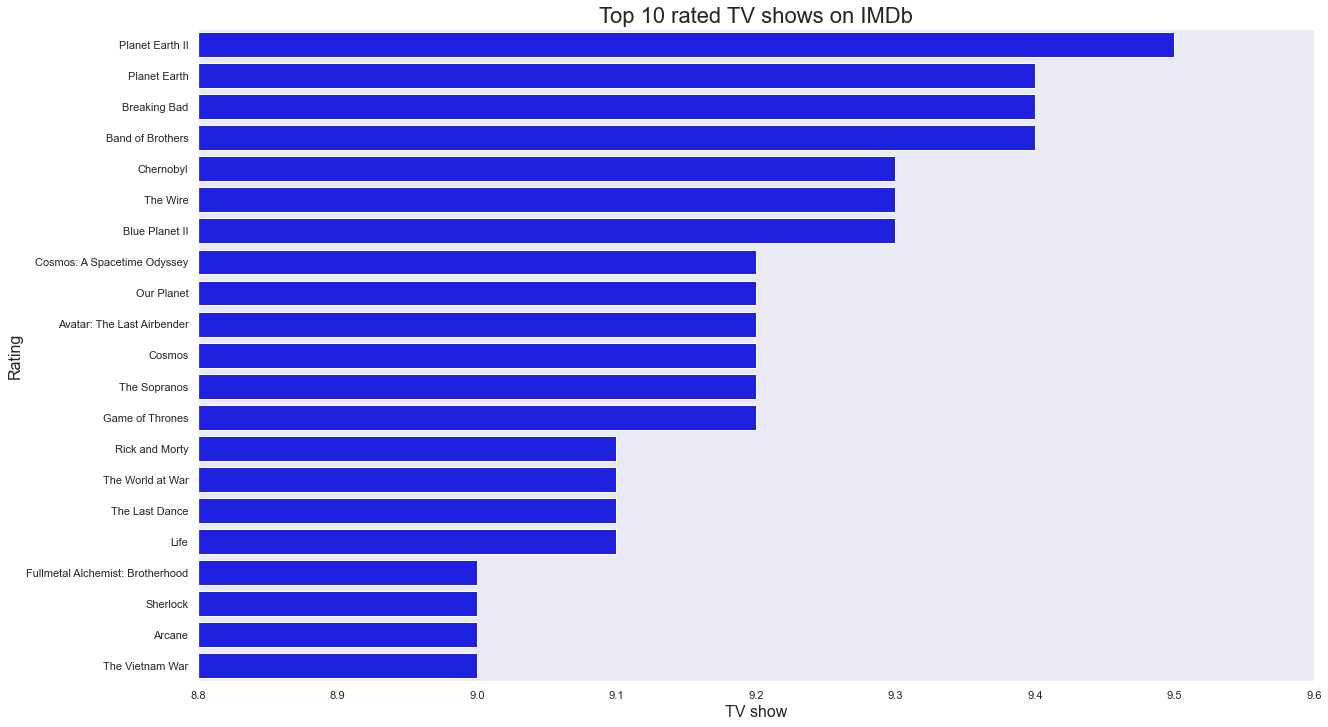

In [8]:
plt.figure(figsize = (20,12))
sns.barplot(y = "title", x = "rating", data = top_20_ratings, color = "blue")
plt.title("Top 10 rated TV shows on IMDb", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Rating", fontsize = 16)
#plt.xticks(rotation = 60)
plt.xlim(8.8,9.6)
plt.show();

In [9]:
top_votes = top_250.sort_values("total_votes", ascending = False).reset_index(drop=True)
top_20_votes = top_votes.loc[:20, ["title", "total_votes"]]

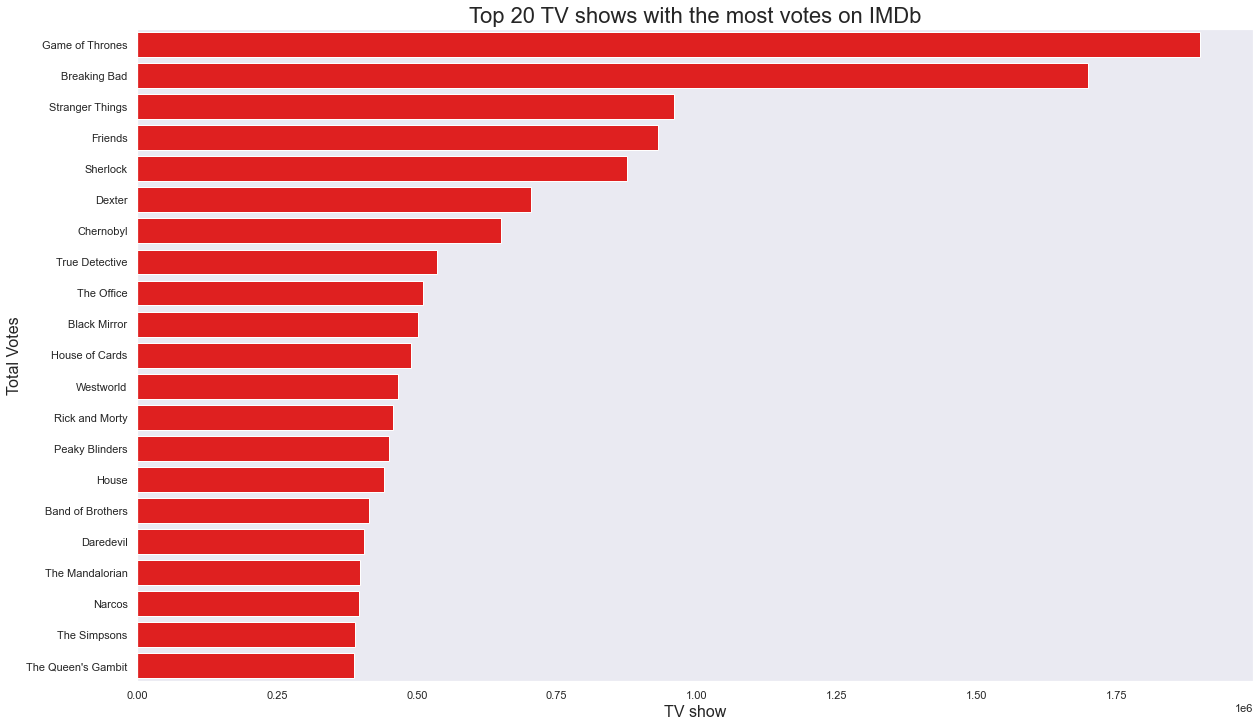

In [10]:
plt.figure(figsize = (20,12))
sns.barplot(y = "title", x = "total_votes", data = top_20_votes, color = "red")
plt.title("Top 20 TV shows with the most votes on IMDb", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Total Votes", fontsize = 16)
#plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();

### Top 20 shows by ratings and votes - Aggregation by episode

In [11]:
mean_ratings = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["rating"].mean()

In [12]:
mean_ratings_sorted = mean_ratings.sort_values("rating", ascending = False).reset_index(drop =True)

In [13]:
top20_mean_ratings = mean_ratings_sorted.loc[:20, ["tv", "rating"]]

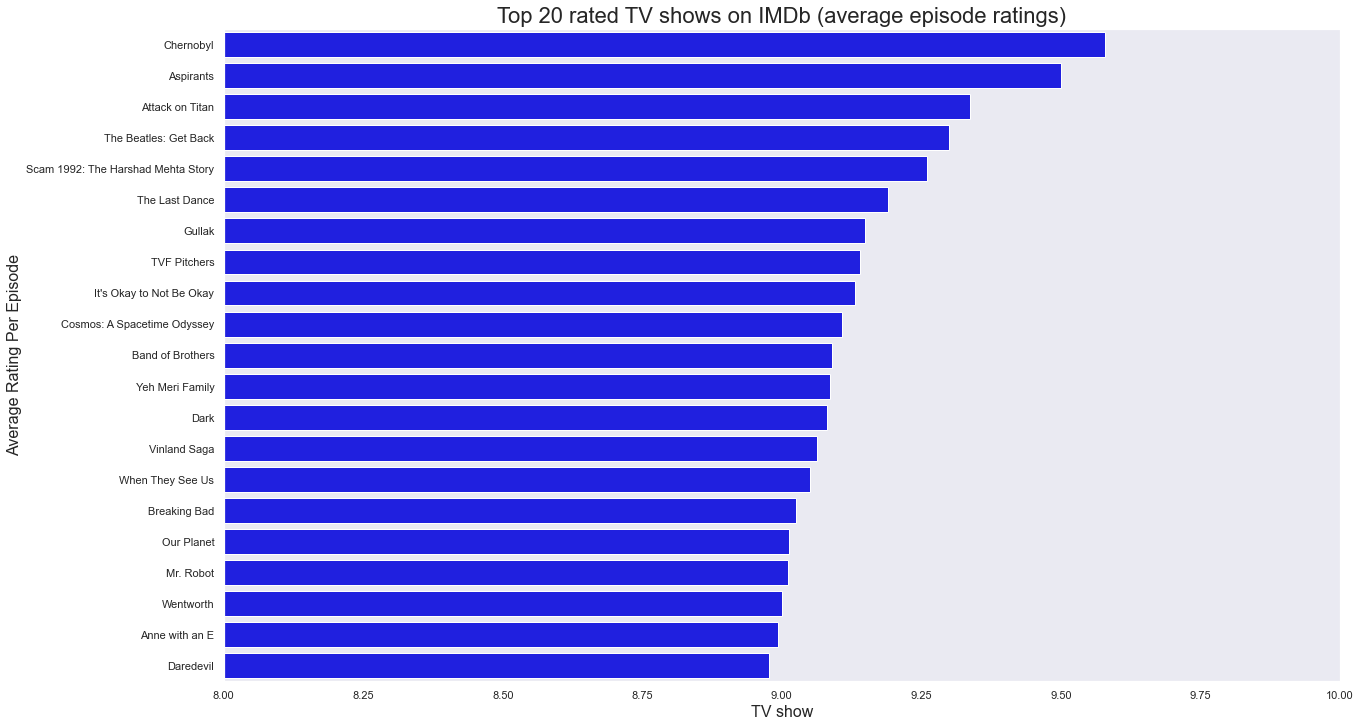

In [14]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "rating", data = top20_mean_ratings, color = "blue")
plt.title("Top 20 rated TV shows on IMDb (average episode ratings)", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Average Rating Per Episode", fontsize = 16)
#plt.xticks(rotation = 60)
plt.xlim(8,10)
plt.show();

In [15]:
mean_votes = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["total_votes"].mean()
mean_votes_sorted = mean_votes.sort_values("total_votes", ascending = False).reset_index(drop = True)
top20_total_votes = mean_votes_sorted.loc[:20, ["tv", "total_votes"]]

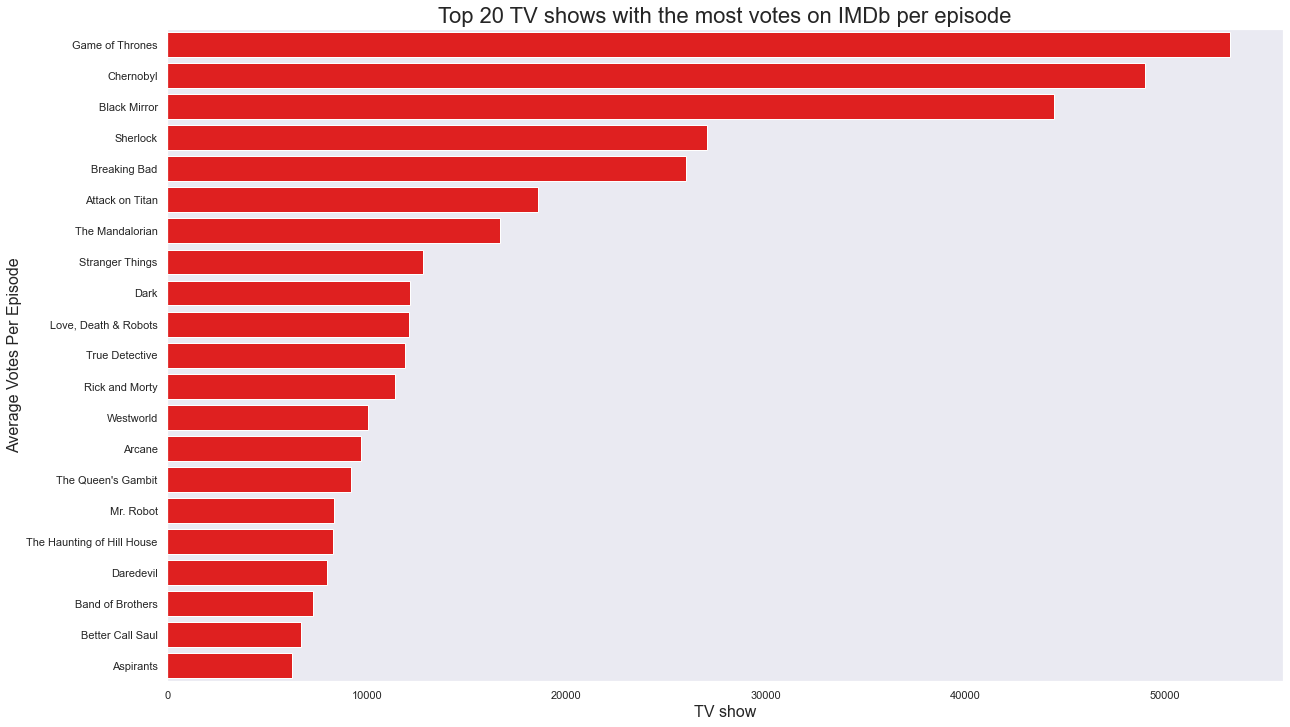

In [16]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "total_votes", data = top20_total_votes, color = "red")
plt.title("Top 20 TV shows with the most votes on IMDb per episode", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Average Votes Per Episode", fontsize = 16)
#plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();

### Top 20 seasons by ratings and votes

In [17]:
season_ratings = imdb_data.groupby(["tv", "encoded_title", "season"], as_index = False)["rating"].mean()

In [18]:
season_ratings["season"] = season_ratings["season"].astype(str)

In [19]:
season_ratings["tv_season"] = season_ratings["tv"] + "," + season_ratings["season"]

In [20]:
season_ratings = season_ratings.sort_values("rating", ascending = False).reset_index()
season_ratings_top20 = season_ratings.loc[:20, ["tv_season", "rating"]]

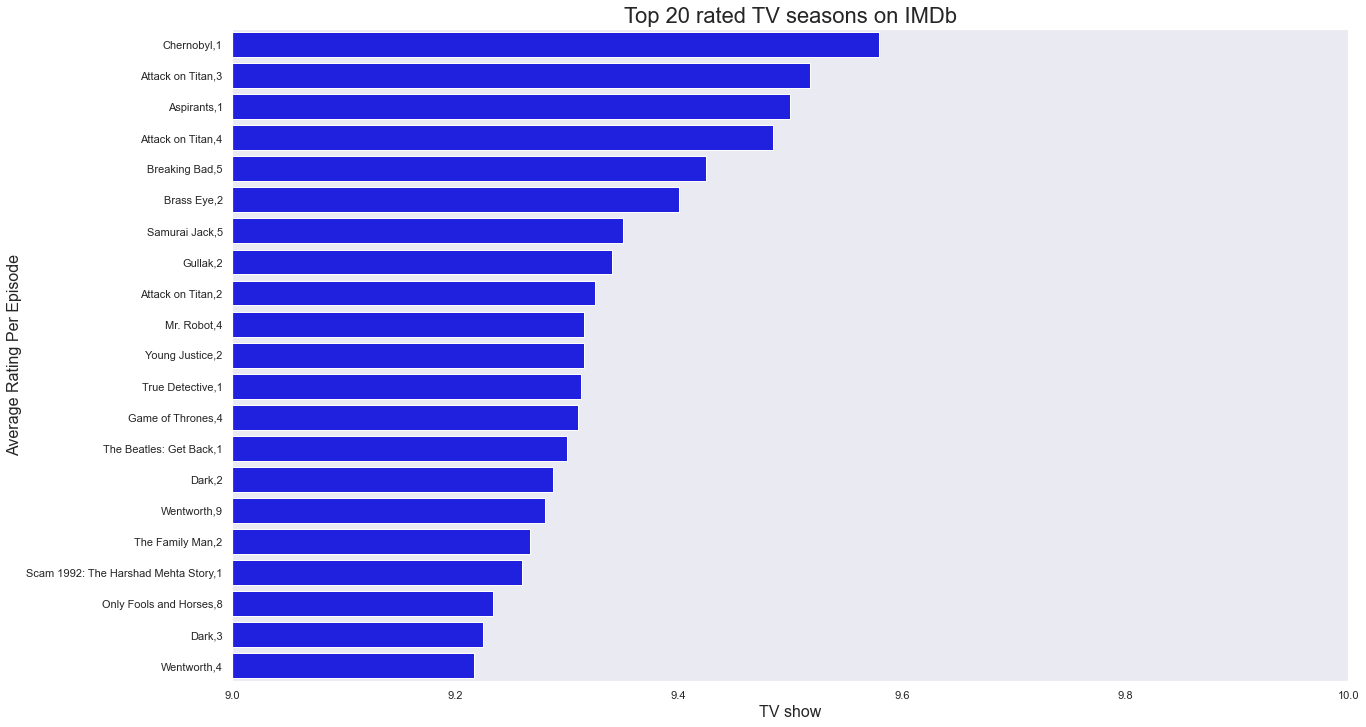

In [21]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv_season", x = "rating", data = season_ratings_top20, color = "blue")
plt.title("Top 20 rated TV seasons on IMDb", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Average Rating Per Episode", fontsize = 16)
#plt.xticks(rotation = 60)
plt.xlim(9,10)
plt.show();

In [22]:
season_votes = imdb_data.groupby(["tv", "encoded_title", "season"], as_index = False)["total_votes"].mean()

In [23]:
season_votes["season"] = season_votes["season"].astype(str)

In [24]:
season_votes["tv_season"] = season_votes["tv"] + "," + season_votes["season"]

In [25]:
season_votes = season_votes.sort_values("total_votes", ascending = False).reset_index()
season_votes_top20 = season_votes.loc[:20, ["tv_season", "total_votes"]]

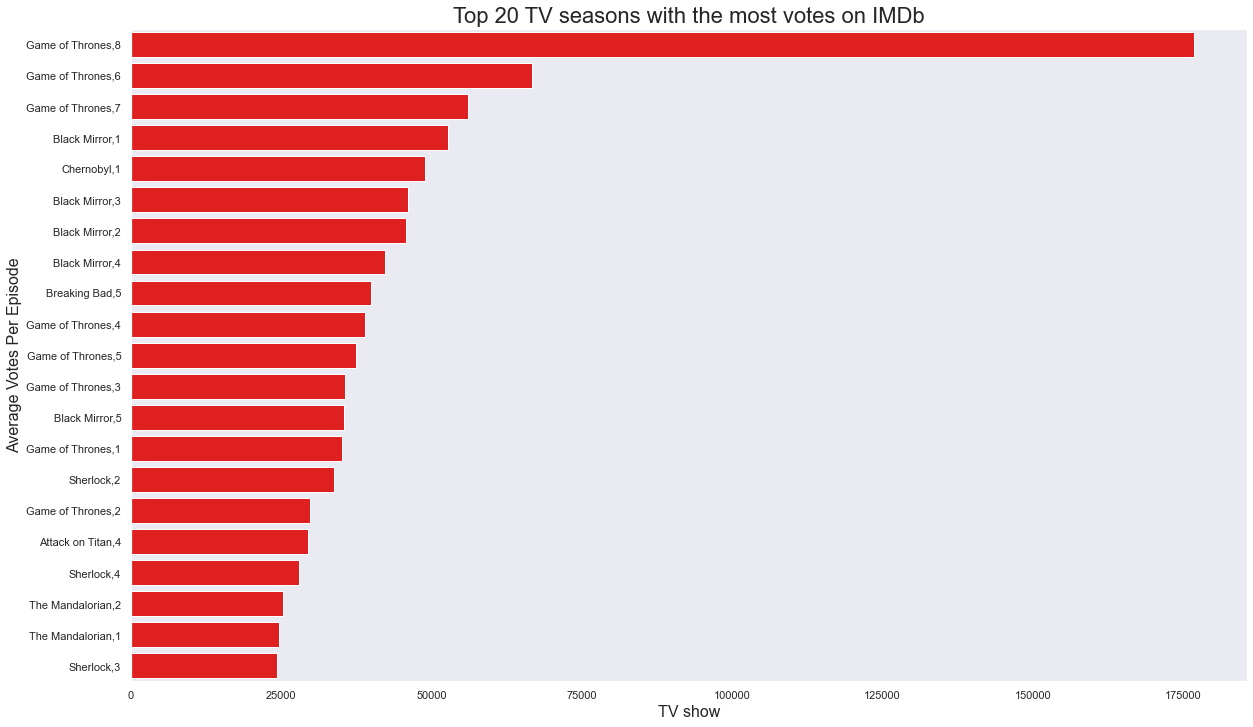

In [26]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv_season", x = "total_votes", data = season_votes_top20, color = "red")
plt.title("Top 20 TV seasons with the most votes on IMDb", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Average Votes Per Episode", fontsize = 16)
#plt.xticks(rotation = 60)
#plt.ylim(8.8,9.6)
plt.show();

### Comparison between IMDb ratings and IMDb ratings by episode

In [27]:
top_250_new = top_250.merge(mean_ratings, on = "encoded_title")

In [28]:
top_250_new = top_250_new.drop('tv', axis = 1)

In [29]:
top_250_new = top_250_new[["title", "rating_x", "rating_y", "total_votes", "encoded_title"]]

In [30]:
top_250_new.to_csv("df.csv")

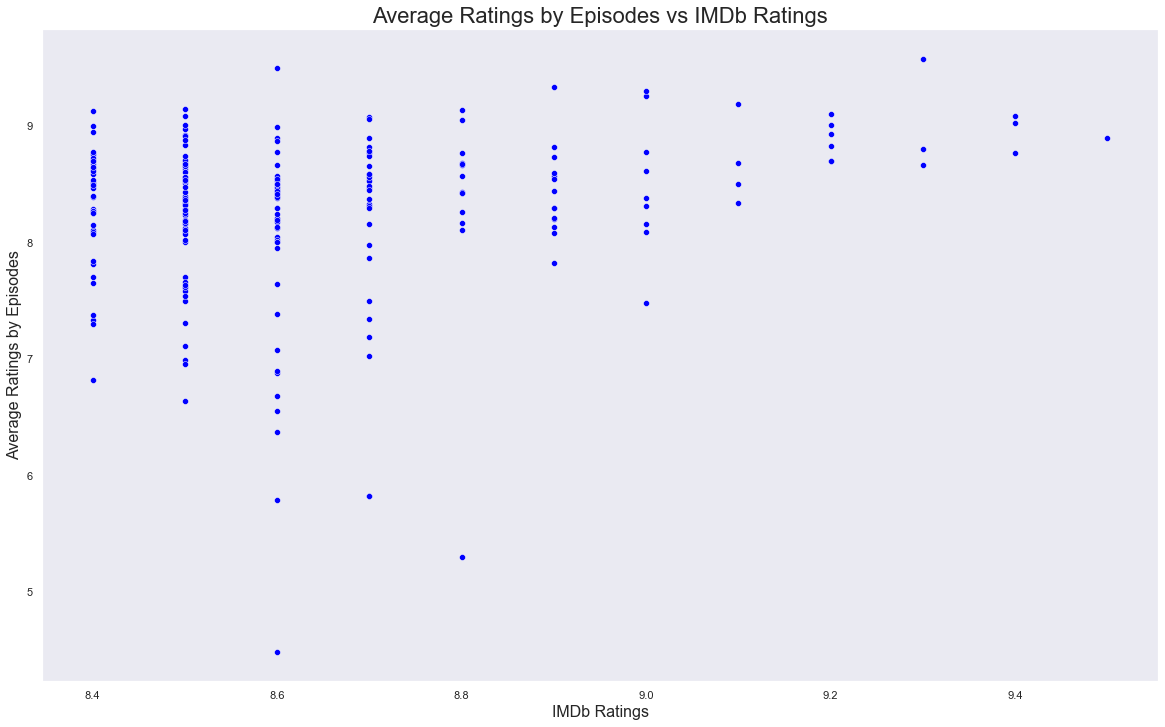

In [31]:
plt.figure(figsize = (20,12))
sns.scatterplot(x = "rating_x", y = "rating_y", data = top_250_new, color = "blue")
plt.title("Average Ratings by Episodes vs IMDb Ratings", fontsize = 22)
plt.xlabel("IMDb Ratings", fontsize = 16)
plt.ylabel("Average Ratings by Episodes", fontsize =16)
plt.show();

### Which TV show produces the best episodes?

In [32]:
best_episodes = top_episodes.groupby(["tv_show", "encoded_title"], as_index = False)["rating"].count()

In [33]:
best_episodes = best_episodes.rename(columns={"rating":"rating_count"})

In [34]:
best_episodes = best_episodes.sort_values("rating_count", ascending = False)
best_episodes_top10 = best_episodes.loc[:10,:]

In [35]:
best_episodes_top10

,tv_show,encoded_title,rating_count
115,One Piece,tt0388629,80
13,Attack on Titan,tt2560140,42
134,Regular Show,tt1710308,29
164,Steven Universe,tt3061046,28
244,Young Justice,tt1641384,24
127,Person of Interest,tt1839578,22
75,Game of Thrones,tt0944947,19
30,Breaking Bad,tt0903747,16
91,JoJo's Bizarre Adventure,tt2359704,16
168,Supernatural,tt0460681,13


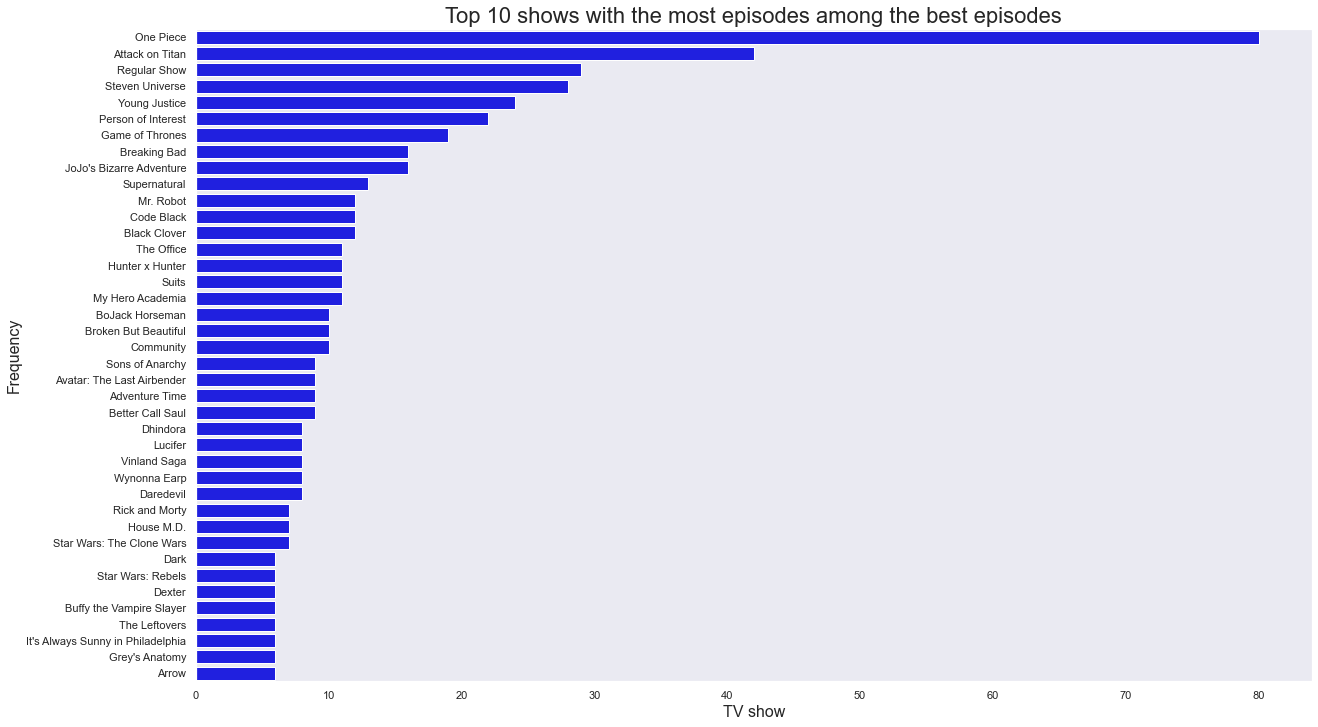

In [36]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv_show", x = "rating_count", data = best_episodes_top10, color = "blue")
plt.title("Top 10 shows with the most episodes among the best episodes", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.show();

In [37]:
imdb_episodes_count = imdb_data.groupby(["tv", "encoded_title"], as_index = False)["rating"].count()

In [38]:
imdb_episodes_count = imdb_episodes_count.rename(columns={"rating":"episode_count"})

In [39]:
best_episodes_prop = imdb_episodes_count.merge(best_episodes, on = "encoded_title")

In [40]:
best_episodes_prop

,tv,encoded_title,episode_count,tv_show,rating_count
0,1883,tt13991232,10,1883,1
1,Adventure Time,tt1305826,289,Adventure Time,9
2,After Life,tt8398600,18,After Life,1
3,Anne with an E,tt5421602,27,Anne with an E,2
4,Arcane,tt11126994,10,Arcane,5
...,...,...,...,...,...
111,What We Do in the Shadows,tt7908628,31,What We Do in the Shadows,1
112,When They See Us,tt7137906,4,When They See Us,1
113,Yellowstone,tt4236770,39,Yellowstone,2
114,Young Justice,tt1641384,98,Young Justice,24


In [41]:
best_episodes_prop["rating_prop"] = best_episodes_prop["rating_count"]/best_episodes_prop["episode_count"]
best_episodes_prop = best_episodes_prop.sort_values("rating_prop", ascending = False).reset_index(drop = True)
best_episodes_prop_top10 = best_episodes_prop.loc[:10,:]

In [42]:
best_episodes_prop_top10

,tv,encoded_title,episode_count,tv_show,rating_count,rating_prop
0,Aspirants,tt14392248,5,Aspirants,5,1.000000
1,Chernobyl,tt7366338,5,Chernobyl,5,1.000000
2,Attack on Titan,tt2560140,79,Attack on Titan,42,0.531646
3,Arcane,tt11126994,10,Arcane,5,0.500000
4,Vinland Saga,tt10233448,24,Vinland Saga,8,0.333333
5,The Beatles: Get Back,tt9735318,3,The Beatles: Get Back,1,0.333333
6,The Last Dance,tt8420184,10,The Last Dance,3,0.300000
7,Scam 1992: The Harshad Mehta Story,tt12392504,10,Scam 1992: The Harshad Mehta Story,3,0.300000
8,Mr. Robot,tt4158110,45,Mr. Robot,12,0.266667
9,Game of Thrones,tt0944947,73,Game of Thrones,19,0.260274


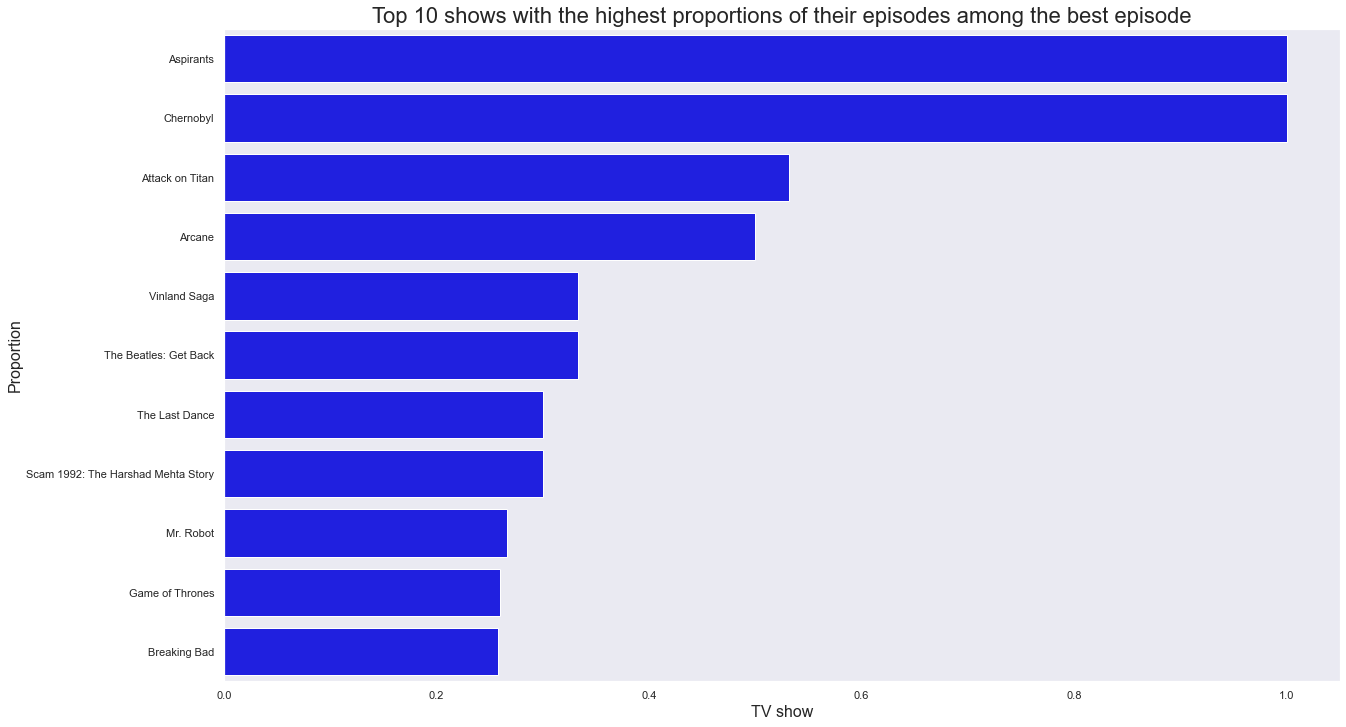

In [43]:
plt.figure(figsize = (20,12))
sns.barplot(y = "tv", x = "rating_prop", data = best_episodes_prop_top10, color = "blue")
plt.title("Top 10 shows with the highest proportions of their episodes among the best episode", fontsize = 22)
plt.xlabel("TV show", fontsize = 16)
plt.ylabel("Proportion", fontsize = 16)
plt.show();

### The Big Shows

In [44]:
imdb_data_big4 = imdb_data[imdb_data["tv"].isin(["Game of Thrones", "Breaking Bad", "The Wire", "The Sopranos"])]

In [45]:
imdb_data_big4["tv"].unique()

array(['Game of Thrones', 'The Sopranos', 'The Wire', 'Breaking Bad'],
      dtype=object)

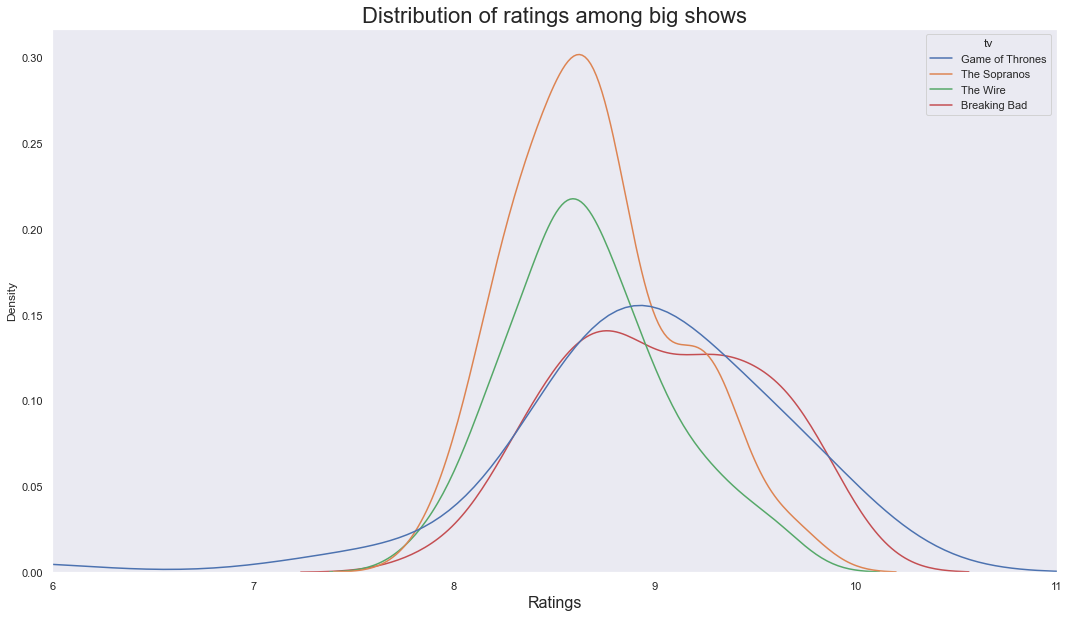

In [46]:
plt.figure(figsize= (18,10))
sns.kdeplot(x = "rating", data = imdb_data_big4, hue = "tv")
plt.title("Distribution of ratings among big shows", fontsize = 22)
plt.xlabel("Ratings", fontsize = 16)
plt.xlim(6,11)
plt.show()

### Genre Analysis top 1000 episodes

In [47]:
top_episodes_collect = top_episodes[["episode", "rating", "genre1", "genre2", "genre3"]]

In [48]:
top_episodes_renew = top_episodes_collect.melt(id_vars = ["episode", "rating"], value_vars = ["genre1", "genre2", "genre3"], var_name = "genres", value_name = "genre")

In [49]:
top_episodes_renew = top_episodes_renew.drop("genres", axis = 1)

In [50]:
top_episodes_renew = top_episodes_renew.dropna()

In [51]:
top_episodes_renew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2696 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   episode  2696 non-null   object 
 1   rating   2696 non-null   float64
 2   genre    2696 non-null   object 
dtypes: float64(1), object(2)
memory usage: 84.2+ KB


In [54]:
top_episodes_genre_count = top_episodes_renew.groupby("genre", as_index = False)["episode"].count()

In [55]:
top_episodes_genre_count

,genre,episode
0,Action,499
1,Adventure,441
2,Animation,417
3,Biography,14
4,Comedy,185
5,Crime,216
6,Documentary,10
7,Drama,509
8,Family,10
9,Fantasy,81
